In [1]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.4/716.4 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requi

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from datetime import datetime

from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values
from darts.metrics import mape
from darts.models import NBEATSModel, LinearRegressionModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller

plt.rcParams["figure.figsize"] = (20, 10)

Dataset: CPCB historical dataset with AQI column

1. Download from [Notion](https://www.notion.so/Exploratory-Data-Analysis-EDA-7ced94927f7f473bad7a651d24828285?pvs=4#b6be005c2b2640c0b89903023b28288b) 
2. Place in your Google drive in a folder: `omdena-airquality/csv_aqi/`

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/omdena-airquality/csv_aqi/

BandraKurlaComplexMumbaiIITM.csv
BandraMumbaiMPCB.csv
BorivaliEastMumbaiIITM.csv
BorivaliEastMumbaiMPCB.csv
ChakalaAndheriEastMumbaiIITM.csv
ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
ColabaMumbaiMPCB.csv
DeonarMumbaiIITM.csv
KandivaliEastMumbaiMPCB.csv
KhindipadaBhandupWestMumbaiIITM.csv
KurlaMumbaiMPCB.csv
MaladWestMumbaiIITM.csv
MazgaonMumbaiIITM.csv
MulundWestMumbaiMPCB.csv
NavyNagarColabaMumbaiIITM.csv
PowaiMumbaiMPCB.csv
SiddharthNagarWorliMumbaiIITM.csv
SionMumbaiMPCB.csv
VasaiWestMumbaiMPCB.csv
VileParleWestMumbaiMPCB.csv
WorliMumbaiMPCB.csv


Get file names. 

In [5]:
directory = "/content/drive/MyDrive/omdena-airquality/csv_aqi/"
all_files = os.listdir(directory)
csv_files = [file for file in all_files if file.endswith(".csv")]
csv_files = sorted(csv_files)
print(csv_files)

['BandraKurlaComplexMumbaiIITM.csv', 'BandraMumbaiMPCB.csv', 'BorivaliEastMumbaiIITM.csv', 'BorivaliEastMumbaiMPCB.csv', 'ChakalaAndheriEastMumbaiIITM.csv', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv', 'ColabaMumbaiMPCB.csv', 'DeonarMumbaiIITM.csv', 'KandivaliEastMumbaiMPCB.csv', 'KhindipadaBhandupWestMumbaiIITM.csv', 'KurlaMumbaiMPCB.csv', 'MaladWestMumbaiIITM.csv', 'MazgaonMumbaiIITM.csv', 'MulundWestMumbaiMPCB.csv', 'NavyNagarColabaMumbaiIITM.csv', 'PowaiMumbaiMPCB.csv', 'SiddharthNagarWorliMumbaiIITM.csv', 'SionMumbaiMPCB.csv', 'VasaiWestMumbaiMPCB.csv', 'VileParleWestMumbaiMPCB.csv', 'WorliMumbaiMPCB.csv']


Load files and clean the files.

In [6]:
df_list = []
station_names = []
for filename in csv_files: 
    print(f'Loading {filename}')
    df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)
    df_list.append(df_temp)
    name, _ = os.path.splitext(filename)
    station_names.append(name)

data_dict = dict(zip(station_names, df_list))

Loading BandraKurlaComplexMumbaiIITM.csv
Loading BandraMumbaiMPCB.csv


<ipython-input-6-537651ad3edb>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)


Loading BorivaliEastMumbaiIITM.csv
Loading BorivaliEastMumbaiMPCB.csv
Loading ChakalaAndheriEastMumbaiIITM.csv
Loading ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
Loading ColabaMumbaiMPCB.csv
Loading DeonarMumbaiIITM.csv
Loading KandivaliEastMumbaiMPCB.csv
Loading KhindipadaBhandupWestMumbaiIITM.csv
Loading KurlaMumbaiMPCB.csv
Loading MaladWestMumbaiIITM.csv
Loading MazgaonMumbaiIITM.csv
Loading MulundWestMumbaiMPCB.csv
Loading NavyNagarColabaMumbaiIITM.csv
Loading PowaiMumbaiMPCB.csv
Loading SiddharthNagarWorliMumbaiIITM.csv
Loading SionMumbaiMPCB.csv
Loading VasaiWestMumbaiMPCB.csv
Loading VileParleWestMumbaiMPCB.csv
Loading WorliMumbaiMPCB.csv


In [7]:
def clean_data(data):
    data["Date"] = pd.to_datetime(data.Date, format='%Y-%m-%d %H:%M:%S') # Format Date column as datetime
    return data 

for key in data_dict.keys():
    data_dict[key] = clean_data(data_dict[key])

Get single station data and convert to hourly data.

In [8]:
df = data_dict['KhindipadaBhandupWestMumbaiIITM']
df_hourly = df.set_index('Date').resample('H').mean().reset_index()

## AQI Forecasting

First, we will use the `AQI_calculated` column alone to forecast future AQI values. To do this we need to convert the data into the `TimeSeries` object. 

In [9]:
ts_aqi = TimeSeries.from_dataframe(df=df_hourly, 
                                   time_col='Date', 
                                   value_cols= ['AQI_calculated'], 
                                   fill_missing_dates=True, 
                                   freq='H')

Text(0.5, 1.0, 'Hourly AQI')

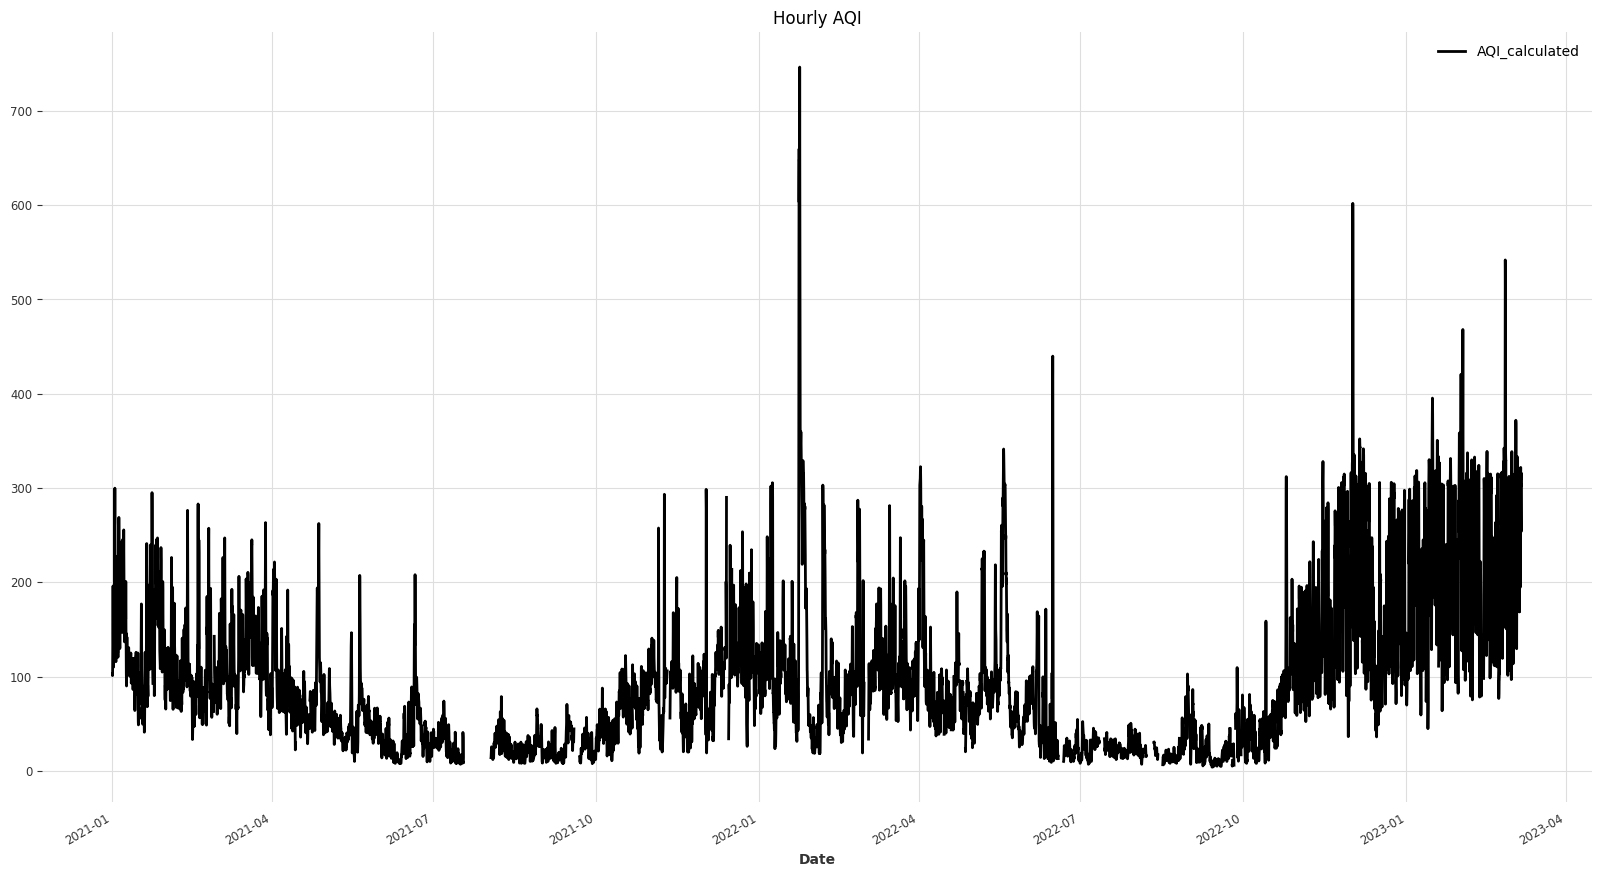

In [10]:
ts_aqi.plot()
plt.title("Hourly AQI")

In [11]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(15, 10))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "MAPE: {}".format(mape(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

Fill in missing values with default method: linear interpolation, and scale the values.

Text(0.5, 1.0, 'Hourly AQI calculated')

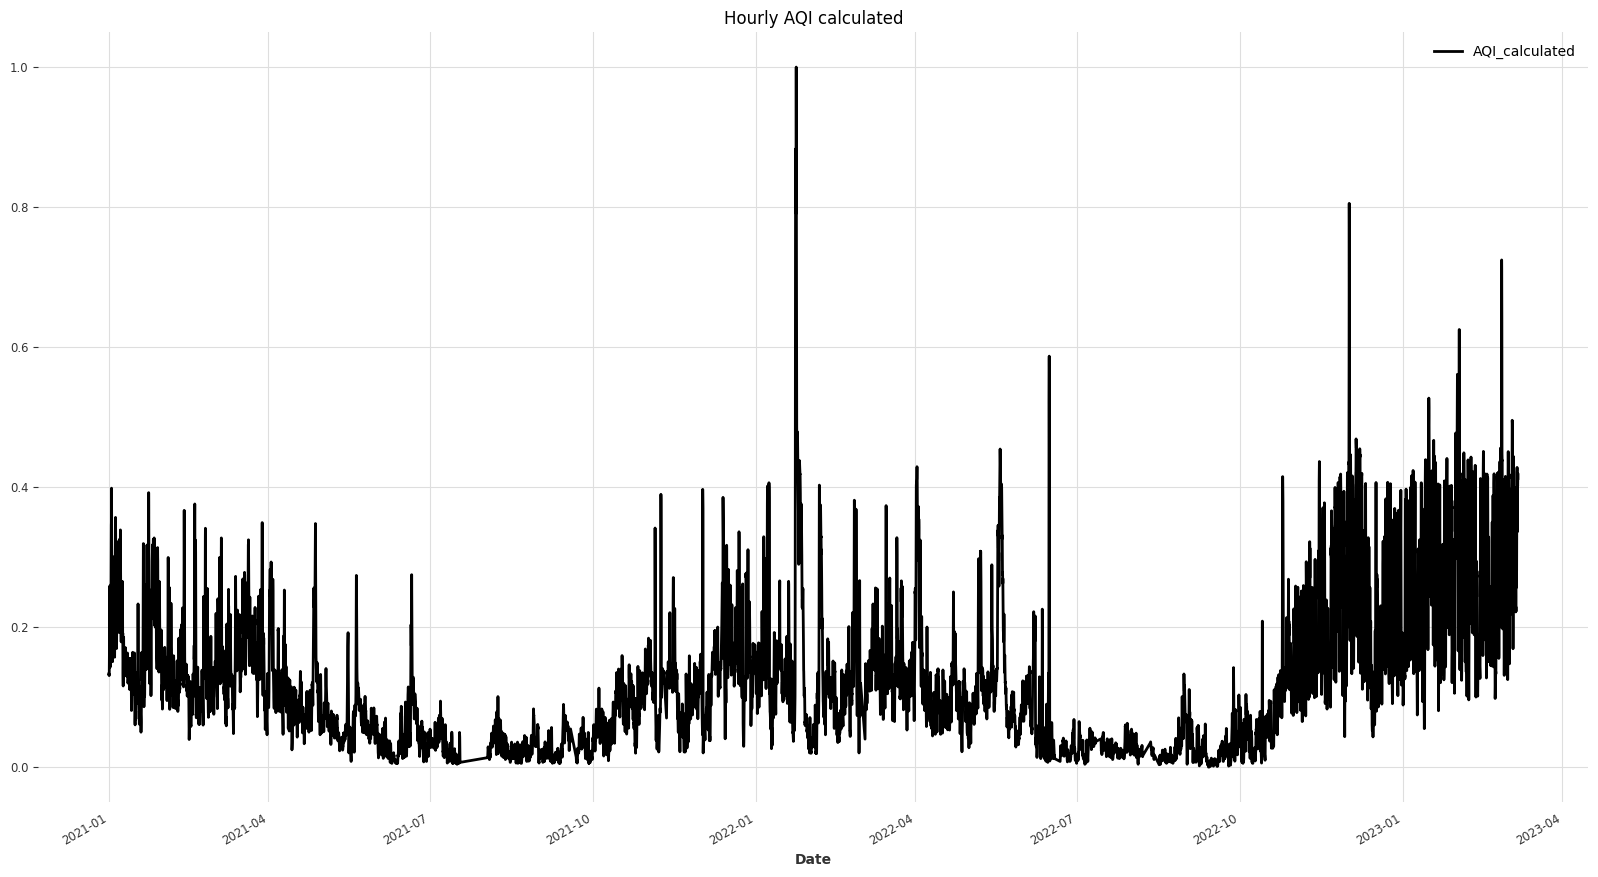

In [12]:
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        ts_aqi
    )
).astype(np.float32)
series.plot()
plt.title("Hourly AQI calculated")

#### Train/Validation split 
Use data after `1-Oct-2022` as validation set and everything before as training set.

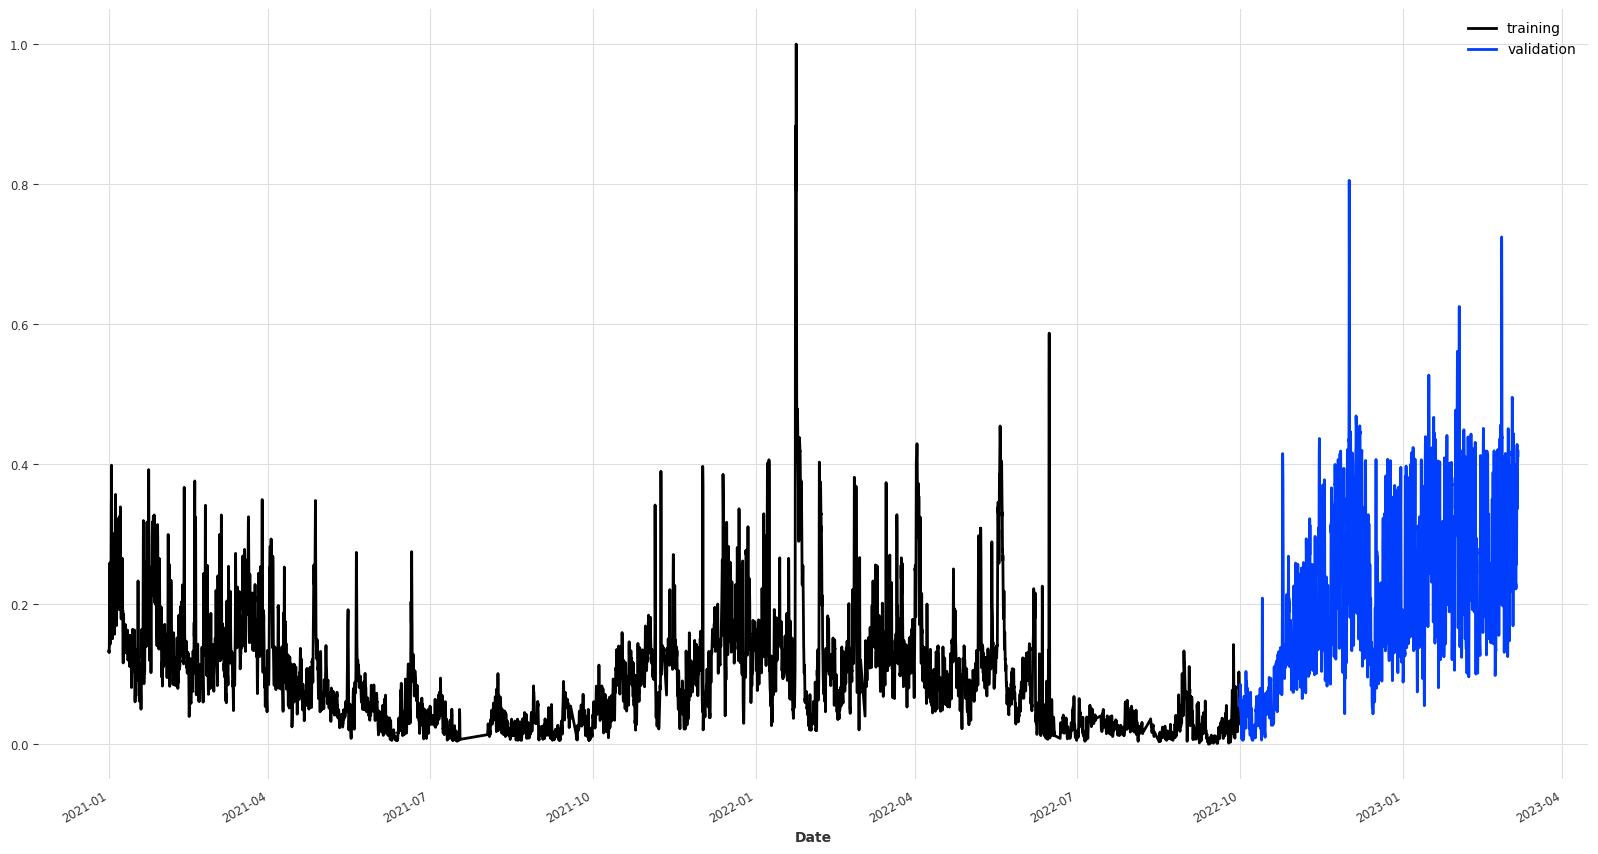

In [13]:
train_ts, val_ts = series.split_after(pd.Timestamp("20221001"))
train_ts.plot(label="training")
val_ts.plot(label="validation")

#### Baseline methods

The `NaiveSeasonal` method is used as a baseline. When `K=1` the last value is repeated as a prediction.

Use [MAPE](https://unit8co.github.io/darts/generated_api/darts.metrics.metrics.html) (Mean Absolute Percentage Error) on the validation set as our evaluation metric.

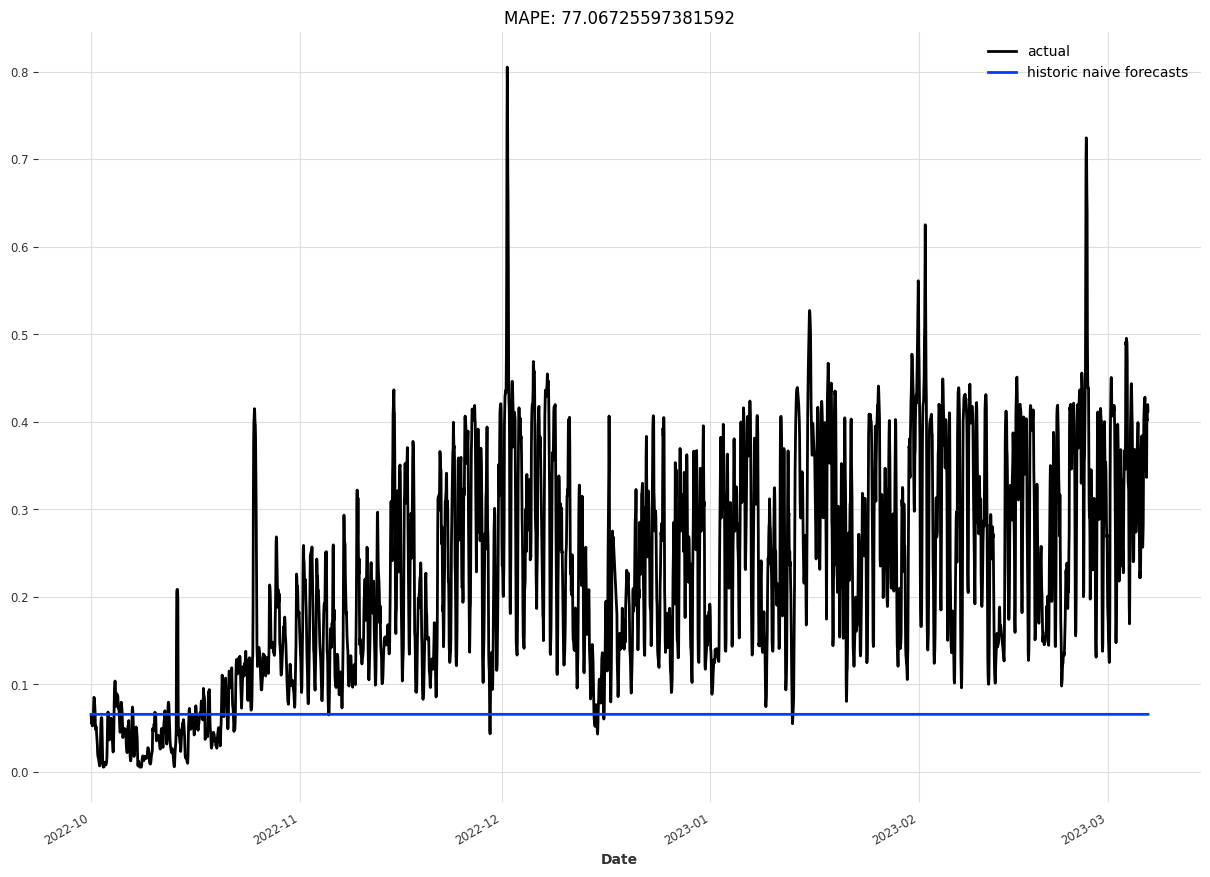

In [14]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train_ts)
naive_forecast = naive_model.predict(len(val_ts))

display_forecast(naive_forecast, series, "naive", start_date=pd.Timestamp("20221001"))


#### Linear Regression Model

In [31]:
model_linreg = LinearRegressionModel(lags=48)
model_linreg.fit(train_ts)

In [32]:
pred_series = model_linreg.historical_forecasts(
    series,
    start=pd.Timestamp("20221001"),
    forecast_horizon=1,
    stride=1,
    retrain=False
)

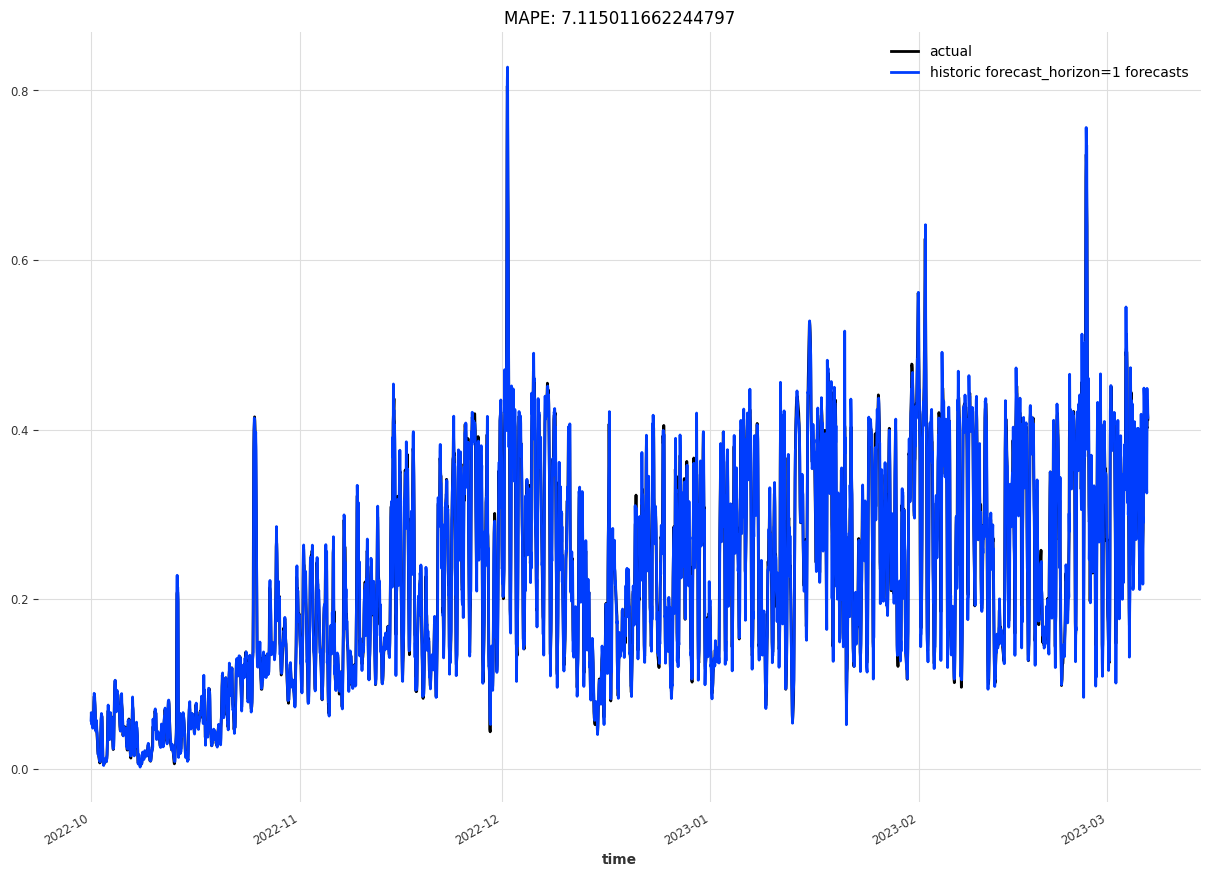

In [33]:
display_forecast(pred_series, series, "forecast_horizon=1", start_date=pd.Timestamp("20221001"))

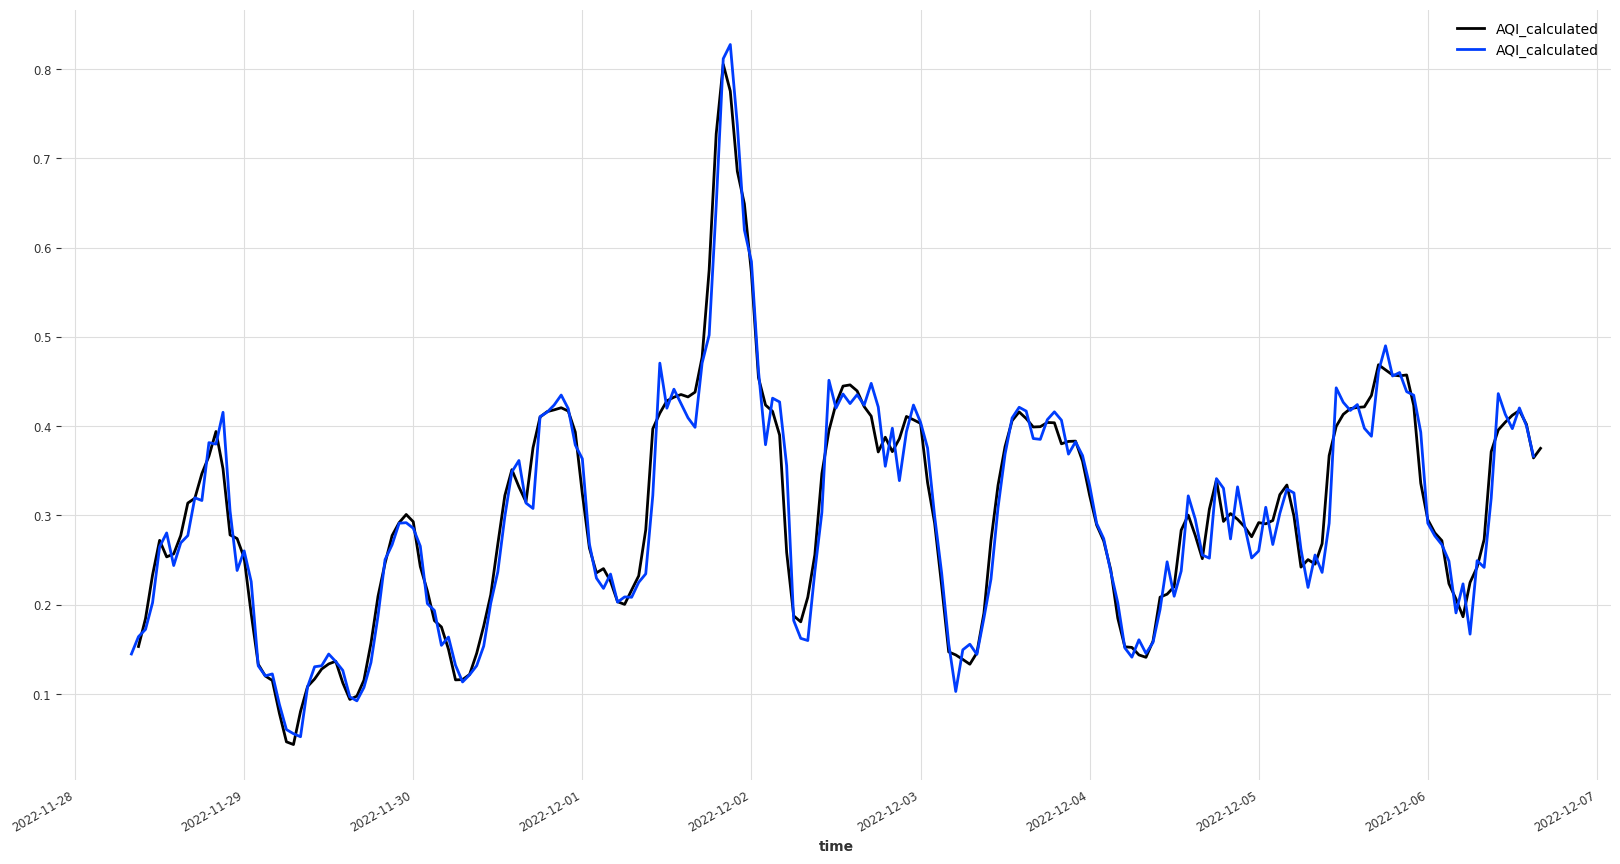

In [34]:
val_ts[1400:1600].plot()
pred_series[1400:1600].plot()

In [50]:
df_hourly.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WS',
       'WD', 'BP', 'Xylene', 'AT', 'RF', 'TOT-RF', 'PM10_24hr_avg',
       'PM2.5_24hr_avg', 'SO2_24hr_avg', 'NOx_24hr_avg', 'NH3_24hr_avg',
       'CO_8hr_max', 'Ozone_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex', 'Checks',
       'AQI_calculated'],
      dtype='object')

In [51]:
ts_pm25 = TimeSeries.from_dataframe(df_hourly, "Date", "PM2.5")
ts_pm10 = TimeSeries.from_dataframe(df_hourly, "Date", "PM10")
ts_no2 = TimeSeries.from_dataframe(df_hourly, "Date", "NO2")
ts_so2 = TimeSeries.from_dataframe(df_hourly, "Date", "SO2")
ts_co = TimeSeries.from_dataframe(df_hourly, "Date", "CO")
ts_ozone = TimeSeries.from_dataframe(df_hourly, "Date", "Ozone")


In [52]:
ts_pm25 = fill_missing_values(ts_pm25)
ts_pm10 = fill_missing_values(ts_pm10)
ts_no2 = fill_missing_values(ts_no2)
ts_so2 = fill_missing_values(ts_so2)
ts_co = fill_missing_values(ts_co)
ts_ozone = fill_missing_values(ts_ozone)

In [62]:
model_linreg_cov = LinearRegressionModel(lags=48,
                                     lags_past_covariates=48)
model_linreg_cov.fit(train_ts, 
                 past_covariates = ts_pm25.stack(ts_pm10).stack(ts_no2).stack(ts_so2).stack(ts_co).stack(ts_ozone))

In [63]:
pred_series = model_linreg_cov.historical_forecasts(
    series,
    start=pd.Timestamp("20221001"),
    forecast_horizon=1,
    stride=5,
    retrain=False
)

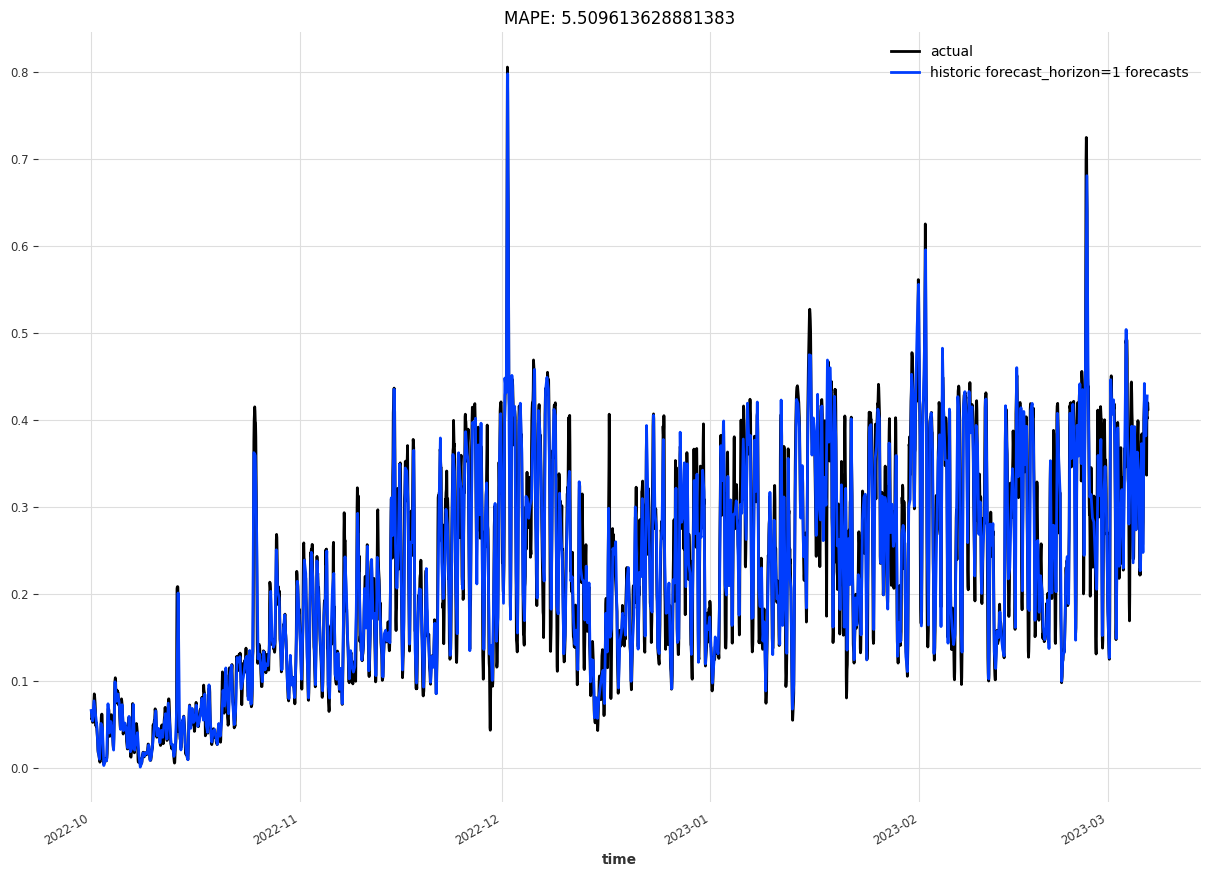

In [64]:
display_forecast(pred_series, series, "forecast_horizon=1", start_date=pd.Timestamp("20221001"))

In [57]:
model_linreg_cov = LinearRegressionModel(lags=48,
                                     lags_past_covariates=48)
model_linreg_cov.fit(train_ts, 
                 past_covariates = ts_pm25.stack(ts_pm10))

In [60]:
pred_series = model_linreg_cov.historical_forecasts(
    series,
    start=pd.Timestamp("20221001"),
    forecast_horizon=1,
    stride=5,
    retrain=False
)

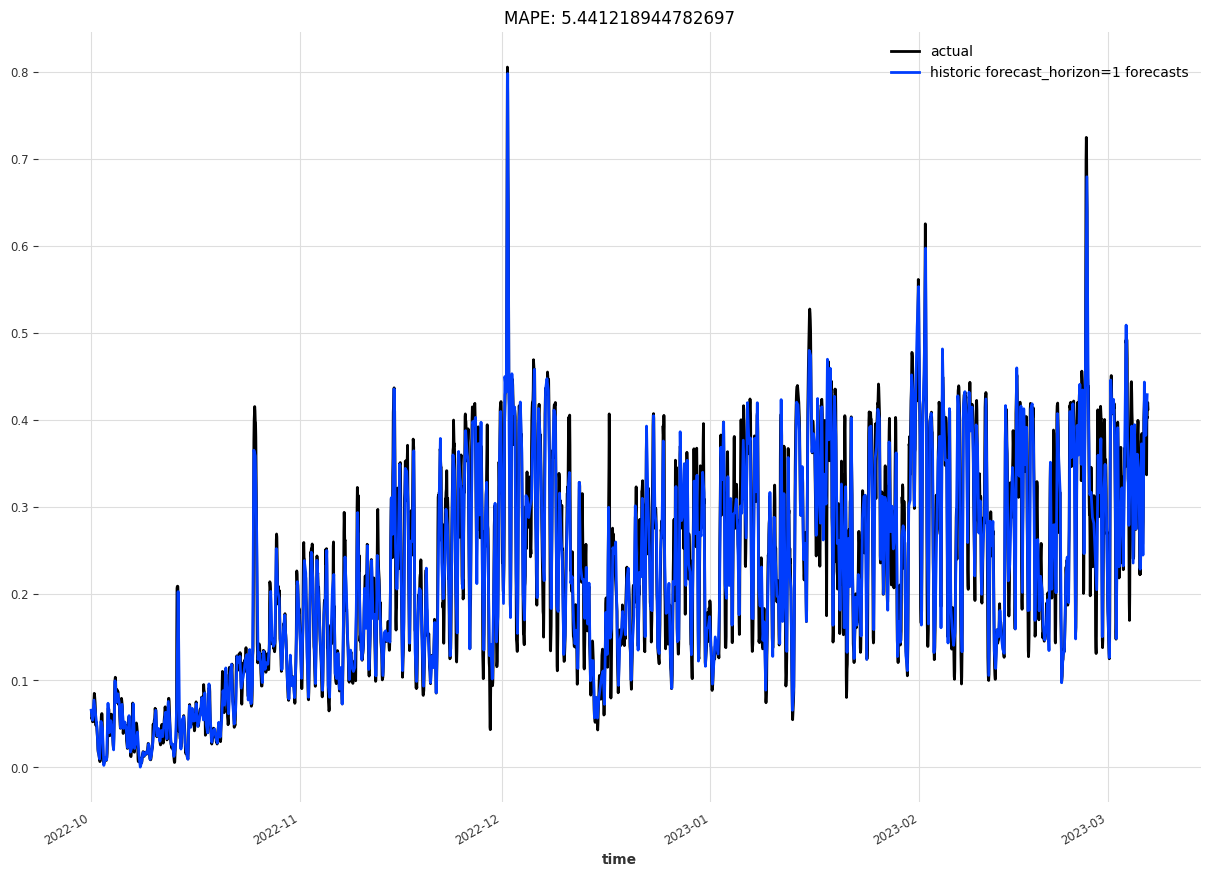

In [61]:
display_forecast(pred_series, series, "forecast_horizon=1", start_date=pd.Timestamp("20221001"))

Add date time attributes as covariates. 

In [41]:
from darts.utils.timeseries_generation import datetime_attribute_timeseries

# build year and month series:
aqi_year = datetime_attribute_timeseries(ts_aqi, attribute="year")
aqi_month = datetime_attribute_timeseries(ts_aqi, attribute="month")
aqi_day = datetime_attribute_timeseries(ts_aqi, attribute="day")
aqi_hour = datetime_attribute_timeseries(ts_aqi, attribute="hour")


In [46]:
model_linreg_cov2 = LinearRegressionModel(lags=48, lags_past_covariates=48)
model_linreg_cov2.fit(train_ts, 
                 past_covariates = aqi_year.stack(aqi_month).stack(aqi_day).stack(aqi_hour))

In [47]:
pred_series = model_linreg_cov2.historical_forecasts(
    series,
    start=pd.Timestamp("20221001"),
    forecast_horizon=1,
    stride=1,
    retrain=False
)

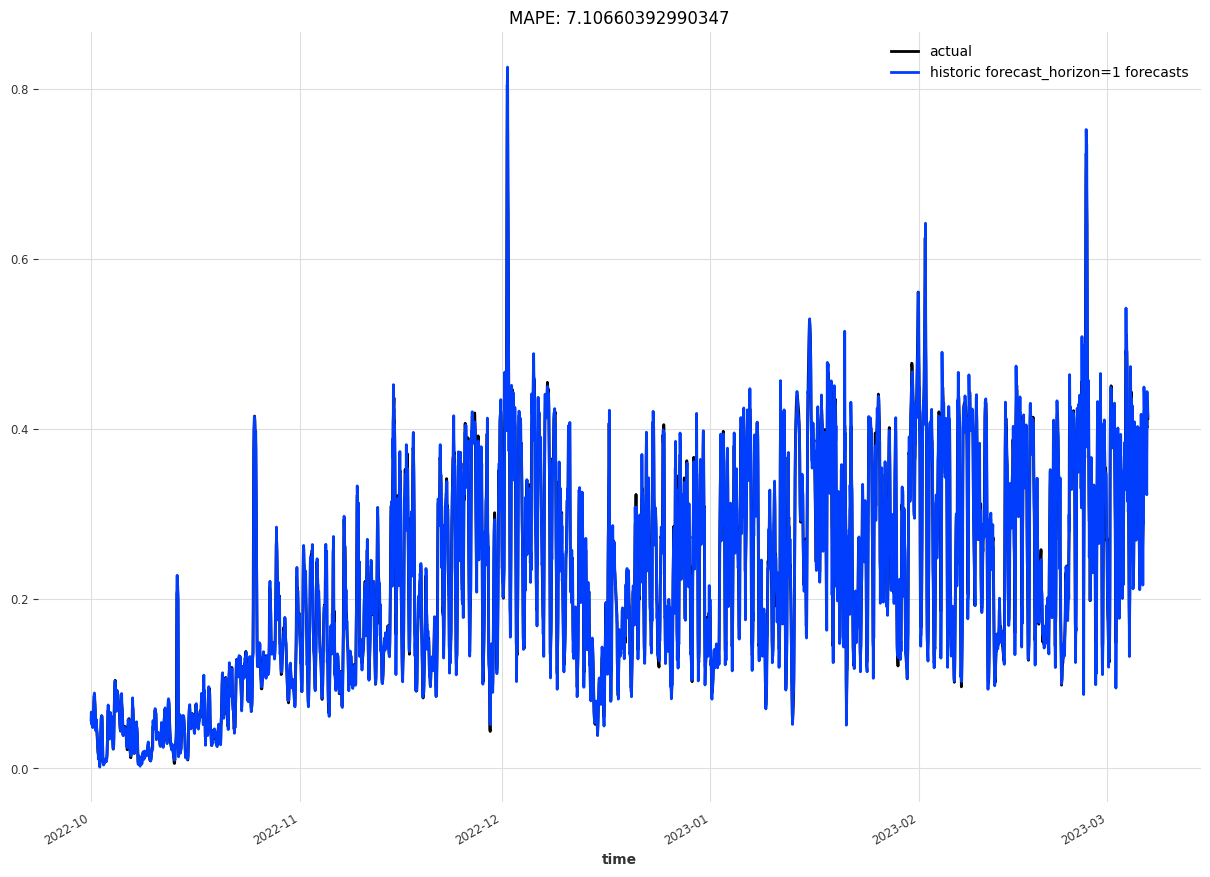

In [48]:
display_forecast(pred_series, series, "forecast_horizon=1", start_date=pd.Timestamp("20221001"))

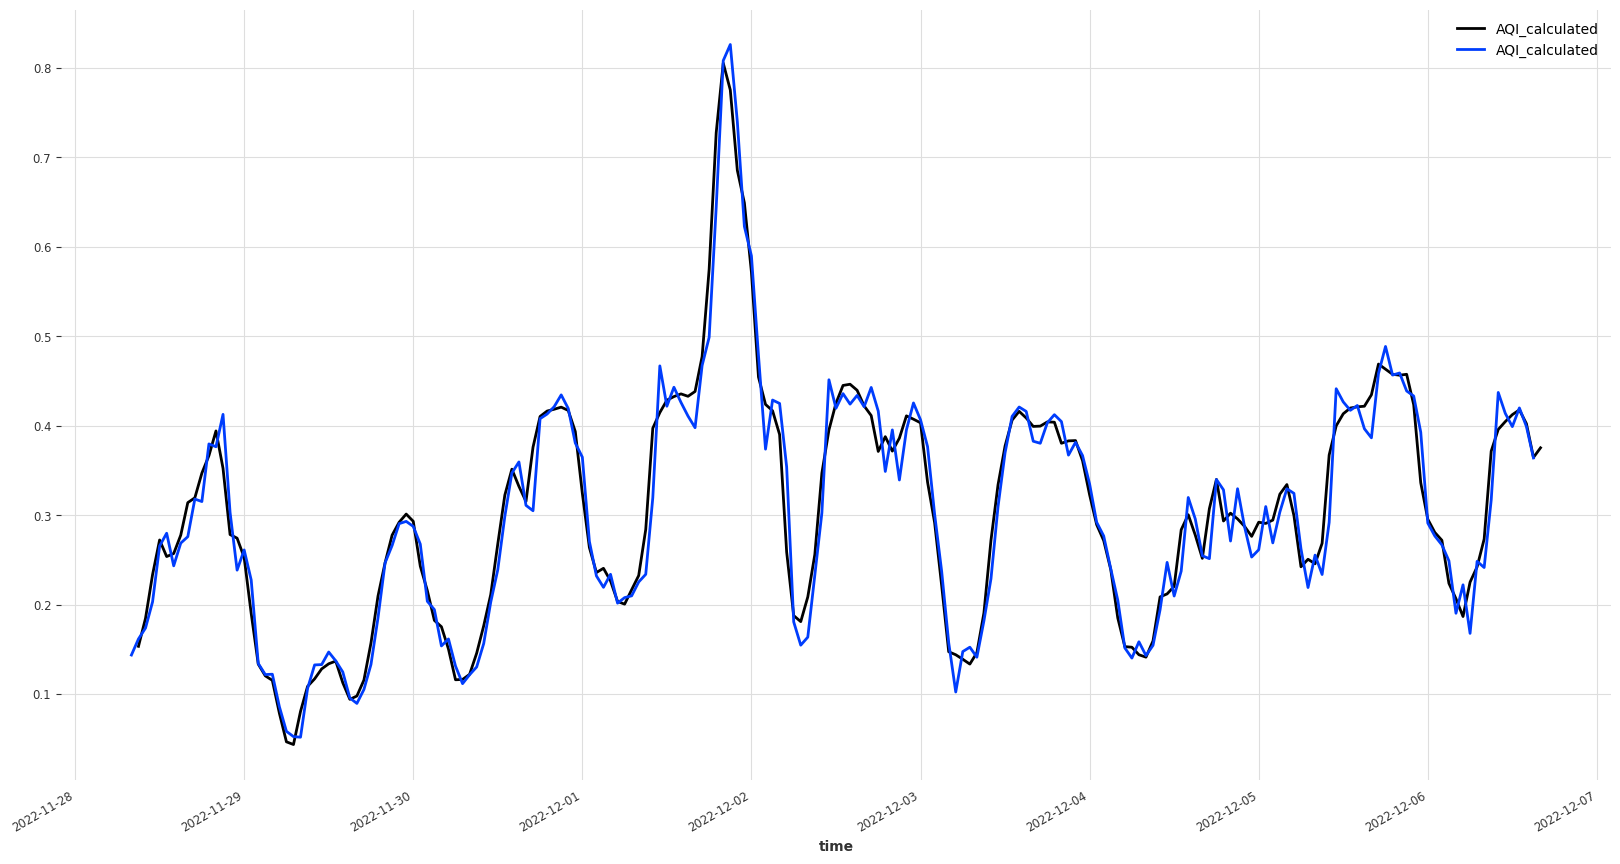

In [49]:
val_ts[1400:1600].plot()
pred_series[1400:1600].plot()

Include weather data 

In [67]:
df_weather = pd.read_csv('/content/KhindipadaBhandupWestMumbaiIITM_weather.csv', index_col=0)

In [69]:
df_weather.columns

Index(['input_latitude', 'input_longitude', 'date', 'temperature', 'humidity',
       'surface_pressure', 'rain', 'weathercode', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'wind_speed', 'wind_direction',
       'windgusts_10m', 'output_latitude', 'output_longitude', 'station_name'],
      dtype='object')

In [70]:
df_weather = df_weather.rename(columns={'date': 'Date'})


In [73]:
df_weather["Date"] = pd.to_datetime(df_weather.Date, format='%Y-%m-%d %H:%M:%S') # Format Date column as datetime

In [91]:
merged_df = pd.merge(df_hourly, df_weather, on='Date', how='outer')
merged_df = merged_df[0:len(df_hourly)]

In [103]:
ts_temp = TimeSeries.from_dataframe(merged_df, "Date", "temperature")
ts_hum = TimeSeries.from_dataframe(merged_df, "Date", "humidity")
ts_rain = TimeSeries.from_dataframe(merged_df, "Date", "rain")

In [107]:
aqi_covariates = ts_temp.stack(ts_hum).stack(ts_rain)
scaler_aqi = Scaler()
aqi_covariates = scaler_aqi.fit_transform(aqi_covariates)


In [108]:
model_linreg_cov3 = LinearRegressionModel(lags=48, lags_past_covariates=48)
model_linreg_cov3.fit(train_ts, 
                 past_covariates = aqi_covariates)

In [109]:
pred_series = model_linreg_cov2.historical_forecasts(
    series,
    start=pd.Timestamp("20221001"),
    forecast_horizon=1,
    stride=5,
    retrain=False
)

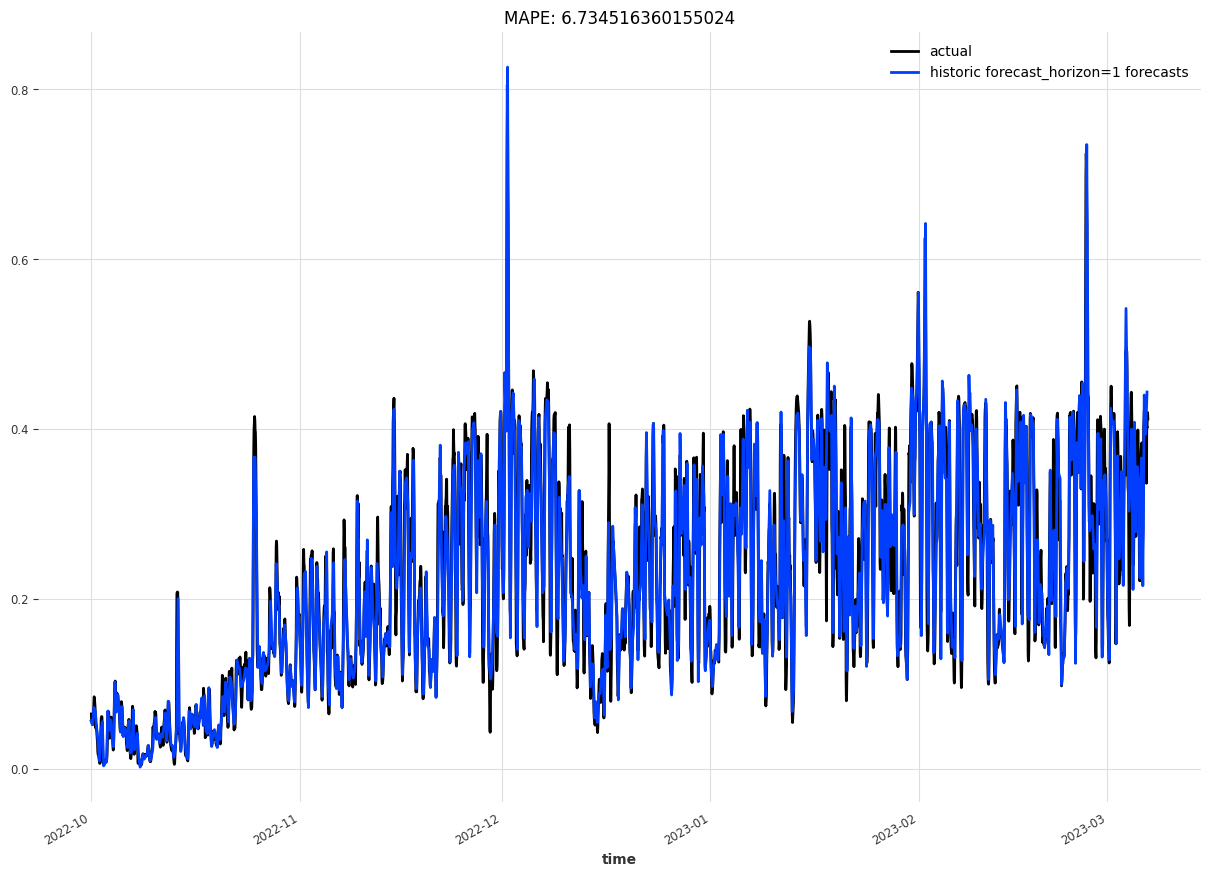

In [110]:
display_forecast(pred_series, series, "forecast_horizon=1", start_date=pd.Timestamp("20221001"))

#### NBEATS model 
Ref: [Darts NBEATS example](https://unit8co.github.io/darts/examples/07-NBEATS-examples.html). 

It was the first purely deep learning model used with time series. See [paper](https://arxiv.org/pdf/1905.10437.pdf).

Darts NBEATS API [documentation](https://unit8co.github.io/darts/generated_api/darts.models.forecasting.nbeats.html)

In [111]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=50,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
    save_checkpoints=True
)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Training time: 
1. GPU Runtime: 3m
2. CPU Runtime: 37m 

Optionally, skip the training and load the trained model from [Notion](https://www.notion.so/task-3-modeling-_-Some-ideas-9cb45373d2734dd6a90628bd18c50f4c#91dbe72a8f784d88a2fc81054b4cb8ba). 

In [113]:
model_nbeats.fit(train_ts, 
                 val_series=val_ts, 
                 verbose=True)

/usr/local/lib/python3.9/dist-packages/lightning_fabric/accelerators/cuda.py:235: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.1 M 
---------------------------------------------------
8.1 M     Trainable params
2.7 K     Non-trainable params
8.1 M     Total params
32.368    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/call.py:54: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


Save the trained model

In [ ]:
timestamp_str = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
timestamp_str = timestamp_str.replace(" ", "") # Remove all spaces
print(timestamp_str)

2023-03-31_15-12-56


In [ ]:
model_path = '/content/drive/MyDrive/omdena-airquality/models/NBEATSModel_nr_' + timestamp_str
model_nbeats.save(model_path)
print(f'Saved model as: {model_path}')


Saved model as: /content/drive/MyDrive/omdena-airquality/models/NBEATSModel_nr_2023-03-31_15-12-56


Load saved model.

In [ ]:
# If you skipped training, update model_path to the downloaded folder from Notion
model_nbeats_loaded = NBEATSModel.load(model_path)

In [ ]:
pred_series = model_nbeats_loaded.historical_forecasts(
    series,
    start=pd.Timestamp("20221001"),
    forecast_horizon=1,
    stride=5,
    retrain=False
)

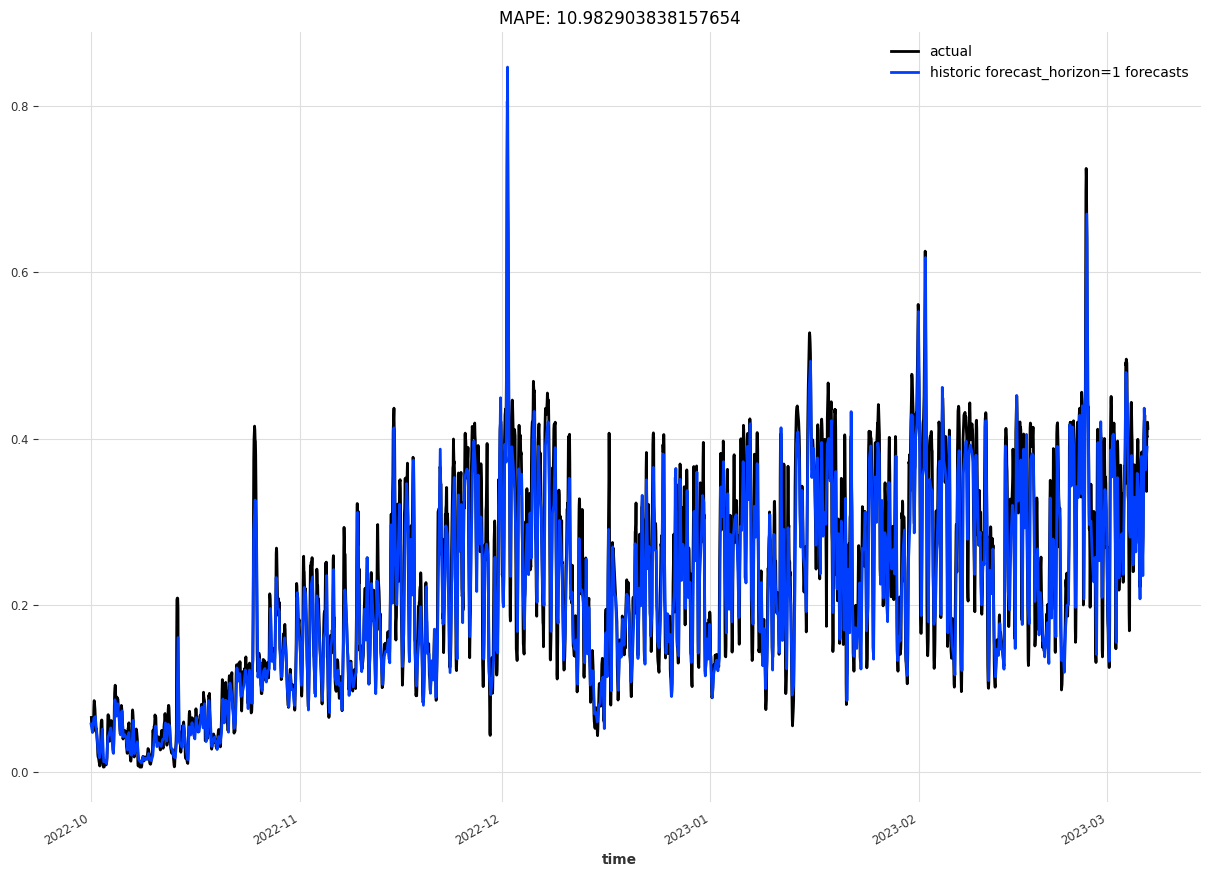

In [ ]:
display_forecast(pred_series, series, "forecast_horizon=1", start_date=pd.Timestamp("20221001"))

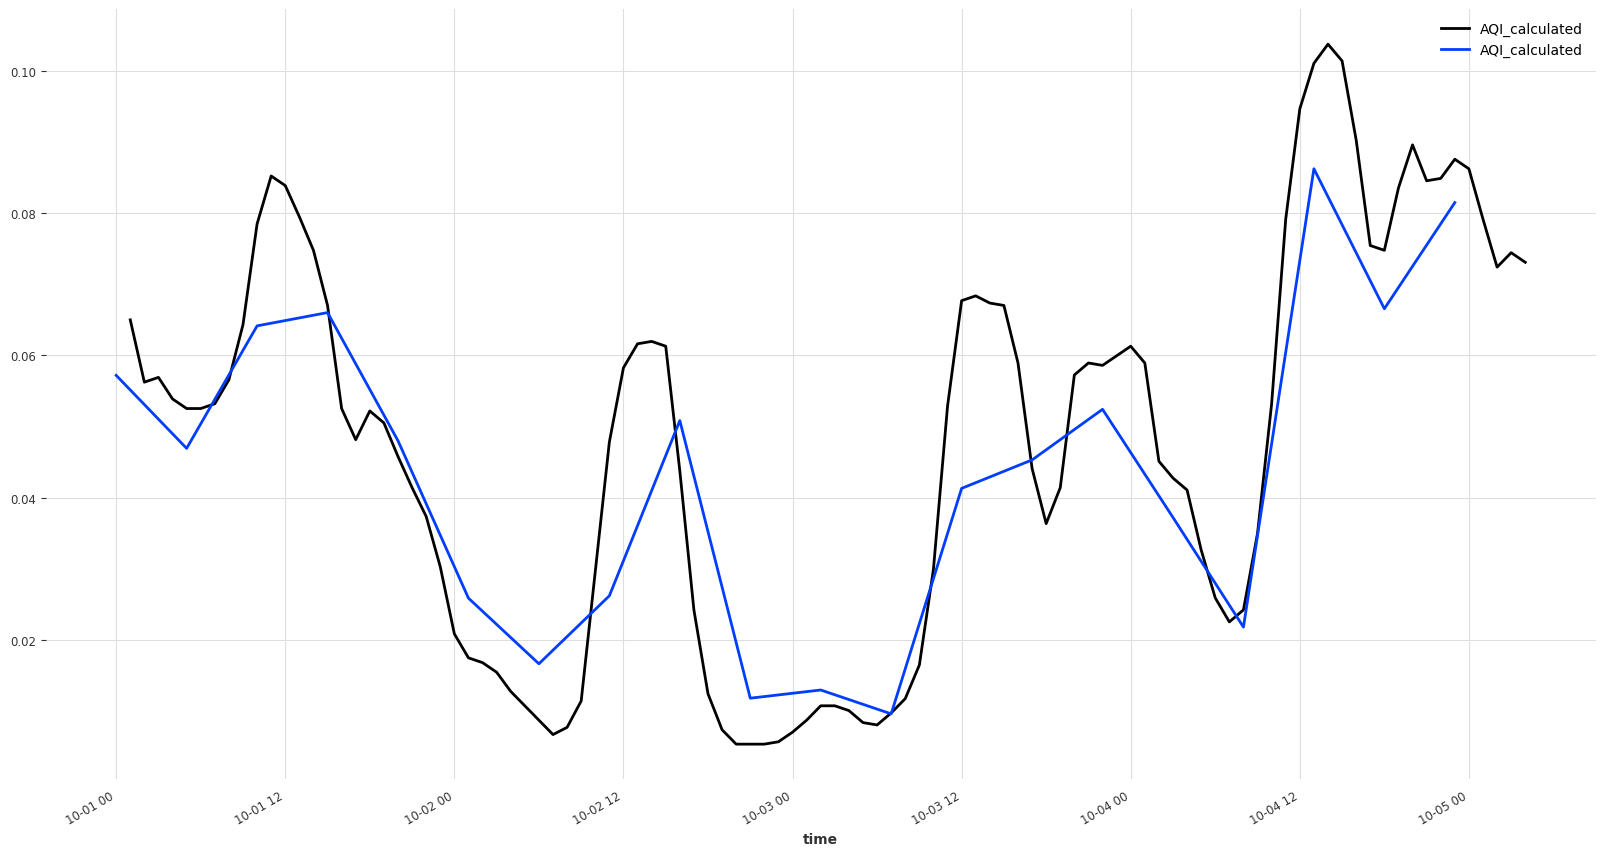

In [ ]:
val_ts[0:100].plot()
pred_series[0:20].plot()